In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 图像灰度化、二值化

(512, 512, 3)


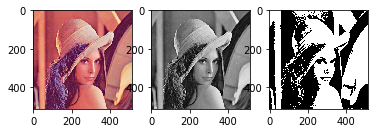

In [3]:
img = cv2.imread('images/lena.png')
print(img.shape)
cv2.imshow('image', img)
cv2.waitKey(0)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray', img_gray)
cv2.waitKey(0)
rows, cols = img_gray.shape
img_binary = np.zeros_like(img_gray)
for i in range(rows):
    for j in range(cols):
        if img_gray[i, j] >= 128:
            img_binary[i, j] = 255
        else:
            img_binary[i, j] = 0
cv2.imshow('binary', img_binary)
cv2.waitKey(0)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(img_gray, cmap=plt.cm.gray)
plt.subplot(1, 3, 3)
plt.imshow(img_binary, cmap=plt.cm.gray)
cv2.destroyAllWindows()

# 最近邻插值

In [4]:
def nearest_interp(img, height, width):
    srch, srcw, channels = img.shape
    dst = np.zeros((height, width, channels), dtype=np.uint8)
    sh = height / srch
    sw = width / srcw
    for i in range(height):
        for j in range(width):
            x = int(i / sh)
            y = int(j / sw)
            dst[i, j] = img[x, y]
    return dst

img = cv2.imread('images/lena.png')
zoom = nearest_interp(img, 300, 300)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.imshow('nearest_interp', zoom)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 双线性插值

In [5]:
import numpy as np
import cv2

def bilinear_interp(img, height, width):
    src_h, src_w, channels = img.shape
    if src_h == height and src_w == width:
        return img.copy()
    dst = np.zeros((height, width, channels), dtype=np.uint8)
    scale_x, scale_y = src_w/width, src_h/height
    for c in range(channels):
        for i in range(height):
            for j in range(width):
                x = (i + 0.5) * scale_x - 0.5
                y = (j + 0.5) * scale_y - 0.5

                src_x0 = int(np.floor(x))
                src_x1 = min(src_x0+1, src_w-1)
                src_y0 = int(np.floor(y))
                src_y1 = min(src_y0+1, src_h-1)
                
                
                temp0 = (src_x1-x) * img[src_y0, src_x0, c] + (x-src_x0) * img[src_y0, src_x1, c]
                temp1 = (src_x1-x) * img[src_y1, src_x0, c] + (x-src_x0) * img[src_y1, src_x1, c]
                dst[j, i, c] = int((src_y1-y) * temp0 + (y-src_y0) * temp1)
    return dst

img = cv2.imread('images/lena.png')
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
zoom = bilinear_interp(img, 400, 400)
cv2.imshow('bilinear_interp', zoom)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 直方图

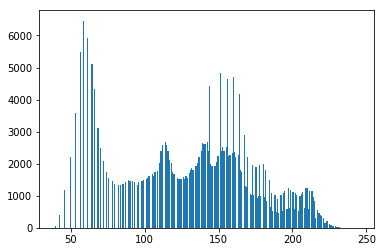

In [6]:
# 灰度图像直方图，直接调用plt函数
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('images/lena.png', 0)
cv2.imshow('gray', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.hist(img.ravel(), 256)
plt.show()

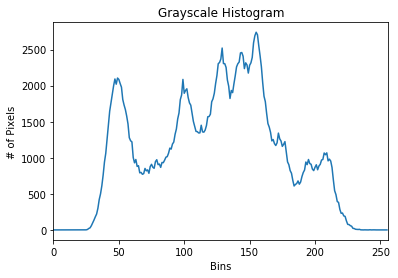

In [7]:
# 灰度图像直方图 opencv函数
img = cv2.imread('images/lena.png', 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of Pixels')
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

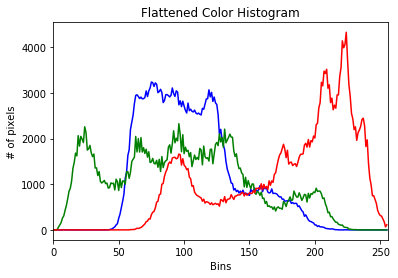

In [8]:
# 彩色直方图
img = cv2.imread('images/lena.png', 1)
chans = cv2.split(img)
colors = ['b', 'g', 'r']
plt.title('Flattened Color Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
for chan, color in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.show()

# 直方图均衡化

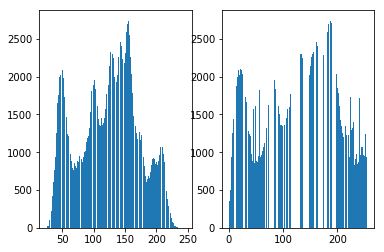

In [9]:
# 灰度图像均衡化
img = cv2.imread('images/lena.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = cv2.equalizeHist(gray)
cv2.imshow('Histogram Equalization', np.hstack([gray, dst]))
cv2.waitKey()
cv2.destroyAllWindows()
plt.subplot(121)
plt.hist(gray.ravel(), 256)
plt.subplot(122)
plt.hist(dst.ravel(), 256)
plt.show()

In [9]:
# 彩色图像的均衡化
img = cv2.imread('images/lena.png')
chans = cv2.split(img)
dst = []
for chan in chans:
    dst.append(cv2.equalizeHist(chan))

cv2.imshow('Histogram Equalization', cv2.merge(dst))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
import cv2
import numpy as np

img = cv2.imread('images/lena.png', 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dict_pixel = {}
print(type(gray))
for i in range(len(gray)):
    for j in range(len(gray[0])):
        dict_pixel[gray[i, j]] = dict_pixel.get(gray[i, j], 0) + 1
keys = sorted(dict_pixel.keys())

<class 'numpy.ndarray'>


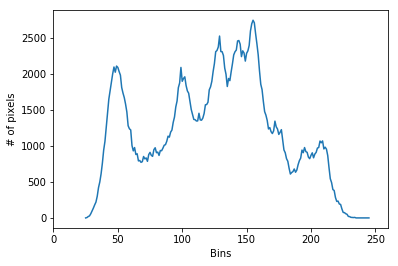

In [11]:
x, y = [], []
for key in keys:
    x.append(key)
    y.append(dict_pixel[key])
plt.plot(x, y)
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.xlim([0, 260])
plt.show()

In [1]:
import numpy as np
import cv2
def hist_equalization(matrix):
    dict_pix = {}
    dict_dst = {}
    dst = np.zeros_like(matrix)
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            dict_pix[matrix[i, j]] = dict_pix.get(matrix[i, j], 0) + 1
    pixs = sorted(dict_pix.keys())
    print('pix\tNi\tPi=Ni/image\tsumPi\tsumPi*256-1\t四舍五入')
    sumPi = 0
    for pix in pixs:
        print(pix, end='\t')
        print(dict_pix[pix], end='\t')
        image = matrix.shape[0] * matrix.shape[1]
        Pi = dict_pix[pix]/image
        print('%.2f\t\t' % Pi, end='')
        sumPi += Pi
        print('%.2f\t' % sumPi, end='')
        result = sumPi * 256 - 1 if sumPi * 256 -1 > 0 else 0
        print('%.2f\t\t' % result, end='')
        
        print(round(result))
        dict_dst[pix] = round(result)
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            dst[i, j] = dict_dst[matrix[i, j]]
    return dst

In [2]:
matrix = np.array([[1, 3, 9, 9, 8], [2, 1, 3, 7, 3], [3, 6, 0, 6, 4], [6, 8, 2, 0, 5], [2, 9, 2, 6, 0]])
hist_equalization(matrix)

pix	Ni	Pi=Ni/image	sumPi	sumPi*256-1	四舍五入
0	3	0.12		0.12	29.72		30
1	2	0.08		0.20	50.20		50
2	4	0.16		0.36	91.16		91
3	4	0.16		0.52	132.12		132
4	1	0.04		0.56	142.36		142
5	1	0.04		0.60	152.60		153
6	4	0.16		0.76	193.56		194
7	1	0.04		0.80	203.80		204
8	2	0.08		0.88	224.28		224
9	3	0.12		1.00	255.00		255


array([[ 50, 132, 255, 255, 224],
       [ 91,  50, 132, 204, 132],
       [132, 194,  30, 194, 142],
       [194, 224,  91,  30, 153],
       [ 91, 255,  91, 194,  30]])

In [3]:
img = cv2.imread('images/lena.png')
b, g, r = cv2.split(img)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bH = hist_equalization(b)
gH = hist_equalization(g)
rH = hist_equalization(r)
dst = cv2.merge([bH, gH, rH])
cv2.imshow('equalization', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

pix	Ni	Pi=Ni/image	sumPi	sumPi*256-1	四舍五入
8	7	0.00		0.00	0.00		0
12	1	0.00		0.00	0.00		0
41	3	0.00		0.00	0.00		0
42	2	0.00		0.00	0.00		0
43	7	0.00		0.00	0.00		0
44	14	0.00		0.00	0.00		0
45	24	0.00		0.00	0.00		0
46	46	0.00		0.00	0.00		0
47	67	0.00		0.00	0.00		0
48	108	0.00		0.00	0.00		0
49	137	0.00		0.00	0.00		0
50	254	0.00		0.00	0.00		0
51	347	0.00		0.00	0.00		0
52	483	0.00		0.01	0.46		0
53	626	0.00		0.01	1.08		1
54	785	0.00		0.01	1.84		2
55	1135	0.00		0.02	2.95		3
56	1262	0.00		0.02	4.18		4
57	1631	0.01		0.03	5.78		6
58	1756	0.01		0.03	7.49		7
59	2201	0.01		0.04	9.64		10
60	2355	0.01		0.05	11.94		12
61	2514	0.01		0.06	14.40		14
62	2767	0.01		0.07	17.10		17
63	2943	0.01		0.08	19.97		20
64	2958	0.01		0.09	22.86		23
65	2921	0.01		0.10	25.71		26
66	2876	0.01		0.12	28.52		29
67	2907	0.01		0.13	31.36		31
68	2869	0.01		0.14	34.16		34
69	2873	0.01		0.15	36.97		37
70	2899	0.01		0.16	39.80		40
71	3043	0.01		0.17	42.77		43
72	2919	0.01		0.18	45.62		46
73	3041	0.01		0.19	48.59		49
74	3107	0.01		0

203	851	0.00		0.97	248.19		248
204	847	0.00		0.98	249.02		249
205	788	0.00		0.98	249.79		250
206	687	0.00		0.98	250.46		250
207	700	0.00		0.98	251.14		251
208	573	0.00		0.99	251.70		252
209	499	0.00		0.99	252.19		252
210	377	0.00		0.99	252.56		253
211	388	0.00		0.99	252.94		253
212	288	0.00		0.99	253.22		253
213	294	0.00		0.99	253.51		254
214	241	0.00		1.00	253.74		254
215	201	0.00		1.00	253.94		254
216	168	0.00		1.00	254.10		254
217	167	0.00		1.00	254.27		254
218	125	0.00		1.00	254.39		254
219	114	0.00		1.00	254.50		254
220	102	0.00		1.00	254.60		255
221	108	0.00		1.00	254.70		255
222	68	0.00		1.00	254.77		255
223	57	0.00		1.00	254.83		255
224	54	0.00		1.00	254.88		255
225	49	0.00		1.00	254.93		255
226	16	0.00		1.00	254.94		255
227	18	0.00		1.00	254.96		255
228	10	0.00		1.00	254.97		255
229	7	0.00		1.00	254.98		255
230	5	0.00		1.00	254.98		255
231	9	0.00		1.00	254.99		255
232	2	0.00		1.00	254.99		255
233	1	0.00		1.00	254.99		255
234	1	0.00		1.00	254.99		255
236	2	0.00		1.00	255.00		25

In [11]:
import matplotlib.pyplot as plt
gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
cv2.imshow('Hist', np.hstack([img_gray, gray]))
cv2.waitKey()
cv2.destroyAllWindows()
plt.hist(gray.ravel(), 256)

error: OpenCV(4.4.0) c:\users\appveyor\appdata\local\temp\1\pip-req-build-6lylwdcz\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xaac33b97::Set<1,-1,-1>,struct cv::impl::A0xaac33b97::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [12]:
?plt.hist()